#**Fashion MNIST Multiclassification**

##**Multiclassification using TensorFlow**


In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [8]:
#load datasets
(train_data,train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
print(f'Training sample:\n{train_data[0]}')
print(f'Training label:\n{train_labels[0]}')


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [10]:
#check shapes of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
#check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

*60,000 training examples, each of shape (28,28), and 10,000 test examples with shape (28,28)*

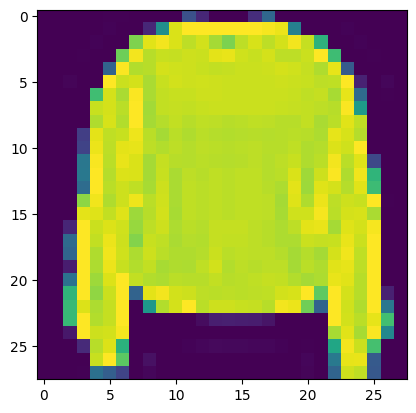

In [12]:
#plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [13]:
train_labels[7]

2

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

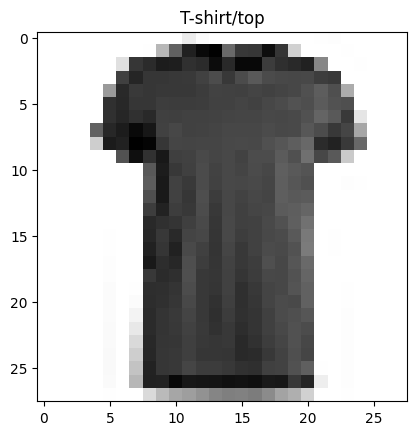

In [15]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

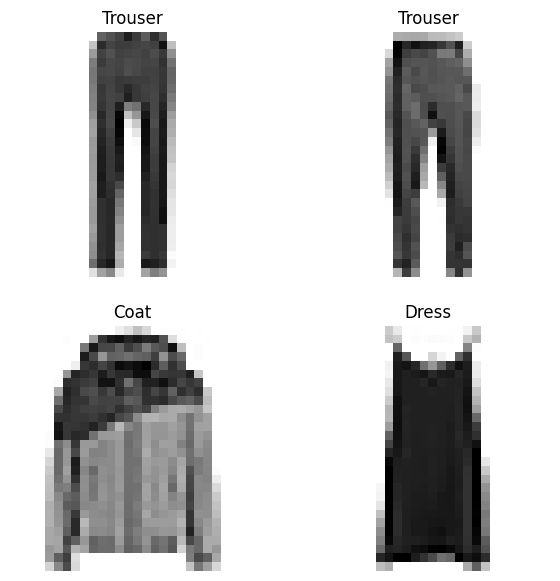

In [16]:
#plotting multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##**Building the model**
- Input layer shape -> (28,28)
- Output layer shape -> 10

In [17]:
#Create the model
model_1= tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)), #reshaping 28x28 to 748 using Flatten method
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

#compile mode
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

non_norm_history = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data,test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1253 - loss: 3.0541 - val_accuracy: 0.2122 - val_loss: 1.9793
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2486 - loss: 1.8802 - val_accuracy: 0.3024 - val_loss: 1.7277
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3074 - loss: 1.6626 - val_accuracy: 0.3202 - val_loss: 1.6408
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3203 - loss: 1.6153 - val_accuracy: 0.3386 - val_loss: 1.5835
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3693 - loss: 1.5167 - val_accuracy: 0.4468 - val_loss: 1.3145
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4449 - loss: 1.3039 - val_accuracy: 0.4468 - val_loss: 1.2808
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4546 - loss: 1.2722 - val_accuracy: 0.4961 - val_loss: 1.2632
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5053 - loss: 1.2118 -

In [18]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [19]:
#Check min and max values of training data
train_data.min(), train_data.max()

(0, 255)

##**Normalizing data**

In [20]:
norm_train_data=train_data/255.0

norm_test_data=test_data/255.0

norm_train_data.min(), norm_train_data.max()

(0.0, 1.0)

##**Recreating the model**

In [21]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

norm_history=model_2.fit(norm_train_data,
                         train_labels,
                         epochs=10,
                         validation_data=(norm_test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3123 - loss: 1.7711 - val_accuracy: 0.6083 - val_loss: 1.0450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6479 - loss: 0.9674 - val_accuracy: 0.6978 - val_loss: 0.8696
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7053 - loss: 0.8199 - val_accuracy: 0.7193 - val_loss: 0.7978
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7263 - loss: 0.7598 - val_accuracy: 0.7348 - val_loss: 0.7625
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7372 - loss: 0.7110 - val_accuracy: 0.7450 - val_loss: 0.6835
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7583 - loss: 0.6416 - val_accuracy: 0.7548 - val_loss: 0.6683
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7715 - loss: 0.6193 - val_accuracy: 0.7676 - val_loss: 0.6372
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7847 - loss: 0.5947 -

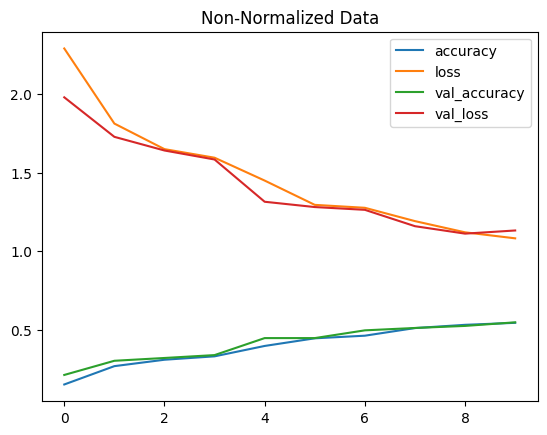

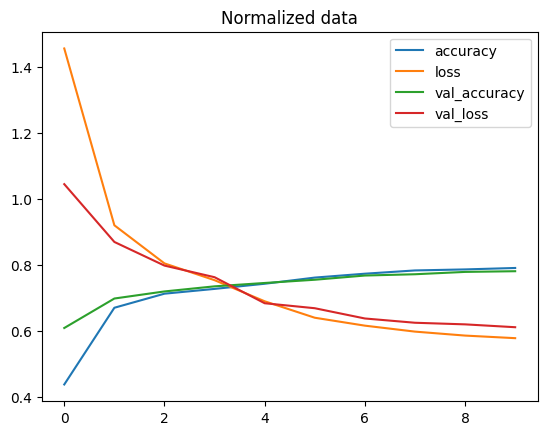

In [22]:
#let's plot each model's history
import pandas as pd

#plotting non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized Data')

#plotting normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data');

##**Finding the ideal learning rate**

In [23]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#creating learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_3.fit(
    norm_train_data,
    train_labels,
    epochs=40,
    validation_data=(norm_test_data, test_labels),
    callbacks=[lr_scheduler]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4041 - loss: 1.5606 - val_accuracy: 0.7063 - val_loss: 0.7782 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7237 - loss: 0.7244 - val_accuracy: 0.7335 - val_loss: 0.6948 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7452 - loss: 0.6608 - val_accuracy: 0.7498 - val_loss: 0.6572 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7682 - loss: 0.6236 - val_accuracy: 0.7819 - val_loss: 0.6276 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7949 - loss: 0.5829 - val_accuracy: 0.7928 - val_loss: 0.6084 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8007 - loss: 0.5694 - val_accuracy: 0.7894 - val_loss: 0.6091 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8030 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

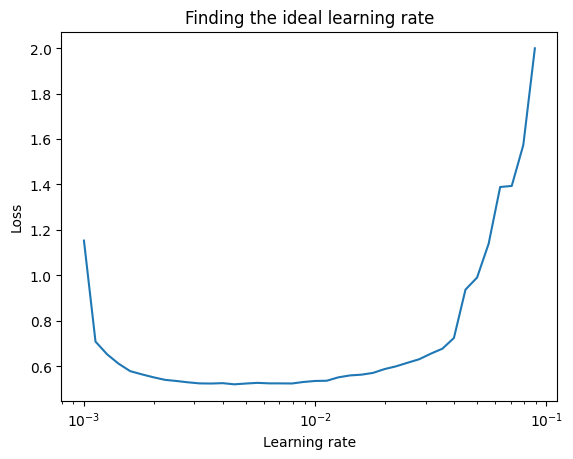

In [24]:
#plotting learning rate decay curve

import numpy as np
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

Ideal learning rate is somewhat closer to the default learning rate of the Adam optimizer (0.001).

In [25]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_4_history = model_4.fit(
    norm_train_data,
    train_labels,
    epochs=30,
    validation_data=(norm_test_data, test_labels)
)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7726 - loss: 0.6362 - val_accuracy: 0.8459 - val_loss: 0.4198
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8599 - loss: 0.3770 - val_accuracy: 0.8553 - val_loss: 0.4022
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8745 - loss: 0.3400 - val_accuracy: 0.8695 - val_loss: 0.3613
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8833 - loss: 0.3110 - val_accuracy: 0.8531 - val_loss: 0.4100
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8856 - loss: 0.3056 - val_accuracy: 0.8795 - val_loss: 0.3433
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8952 - loss: 0.2797 - val_accuracy: 0.8707 - val_loss: 0.3531
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8988 - loss: 0.2706 - val_accuracy: 0.8708 - val_loss: 0.3706
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9001 - loss: 0

In [50]:
#creating confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  """
  Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  cm = confusion_matrix(y_true, y_pred)

  cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] #normalize
  n_classes = cm.shape[0] #find number of classes

  fig, ax = plt.subplots(figsize=figsize)
  cax= ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(n_classes)

  ax.set(
      title = 'Confusion Matrix',
      xlabel = 'Predicted Label',
      ylabel = 'True Label',
      xticks = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels
      )
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  threshold = (cm.max() + cm.min())/2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
             horizontalalignment='center',
             color = 'white' if cm[i,j] > threshold else 'black',
             size = text_size
             )






In [35]:
y_probs = model_4.predict(norm_test_data)

y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.0653310e-06, 3.4857198e-06, 4.9327067e-09, 1.5044765e-09,
        1.2287591e-09, 3.3541253e-06, 7.8731563e-09, 3.7980592e-03,
        3.6208421e-09, 9.9619299e-01],
       [2.3068517e-06, 1.0498864e-15, 9.9478632e-01, 7.7874718e-14,
        4.7655273e-03, 2.9252578e-14, 4.4573128e-04, 4.5682128e-11,
        1.8452689e-13, 1.5516071e-16],
       [1.3355446e-26, 9.9999994e-01, 0.0000000e+00, 4.1139288e-31,
        4.4423460e-33, 0.0000000e+00, 4.2457326e-24, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.1605211e-22, 9.9999994e-01, 6.1897625e-34, 1.1496668e-24,
        8.9184211e-28, 0.0000000e+00, 3.2289299e-20, 0.0000000e+00,
        1.1871334e-33, 0.0000000e+00],
       [1.4969715e-01, 2.6091238e-10, 1.1934472e-03, 8.2637825e-07,
        8.9746283e-04, 1.0461977e-09, 8.4821069e-01, 6.6879297e-10,
        4.0684122e-07, 1.8159802e-11]], dtype=float32)

In [36]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [37]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [38]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[883,   0,   8,  17,   3,   1,  82,   0,   6,   0],
       [ 10, 967,   0,  18,   2,   0,   2,   0,   1,   0],
       [ 31,   0, 785,  16,  93,   0,  74,   0,   1,   0],
       [ 43,   2,   5, 882,  44,   0,  23,   0,   1,   0],
       [  3,   0,  85,  19, 833,   0,  55,   0,   5,   0],
       [  0,   0,   0,   1,   0, 959,   0,  29,   1,  10],
       [157,   1,  62,  24,  76,   0, 676,   0,   4,   0],
       [  0,   0,   0,   0,   0,  10,   0, 975,   0,  15],
       [  5,   1,   1,   5,   5,   2,   7,   3, 971,   0],
       [  0,   0,   0,   0,   0,   5,   1,  57,   0, 937]])

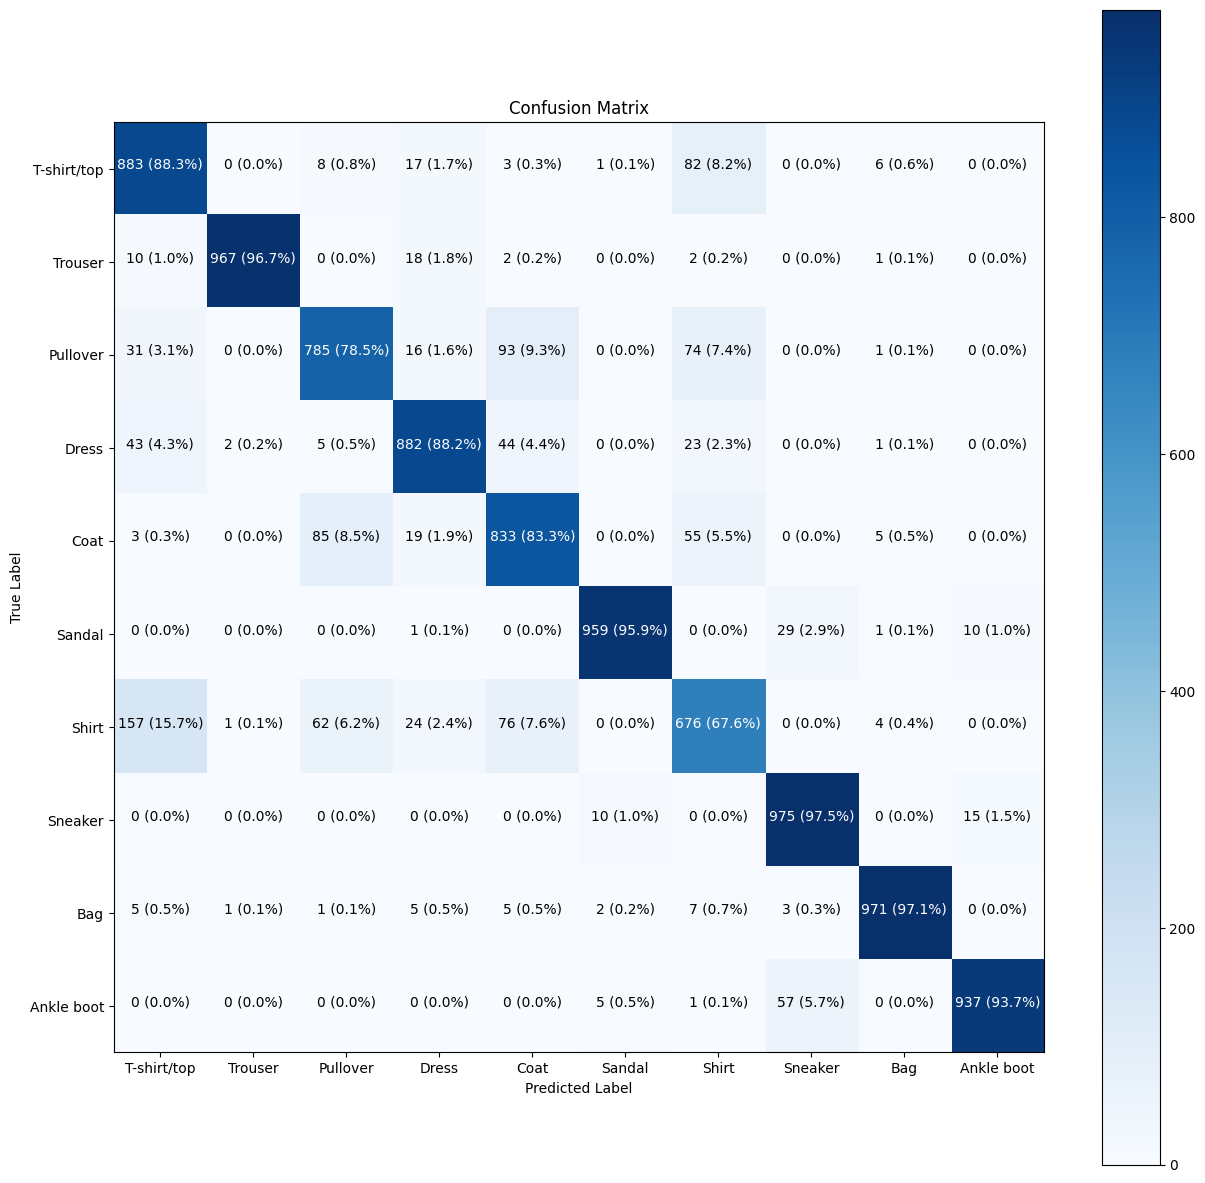

In [39]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

##**Plotting random test samples**

In [42]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a predicted and truth label

  Args:
    model: a trained model
    images: a set of random images in tensor form
    true_labels: array of ground truth labels for images
    classes: array of class names for images

  Returns:
    A plot of a random image from images, with a predicted class label from model
    as well as the truth class label from true_labels
  """
  i = random.randint(0, len(images))
  target_image = images[i]

  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]

  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)


  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", color=color)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


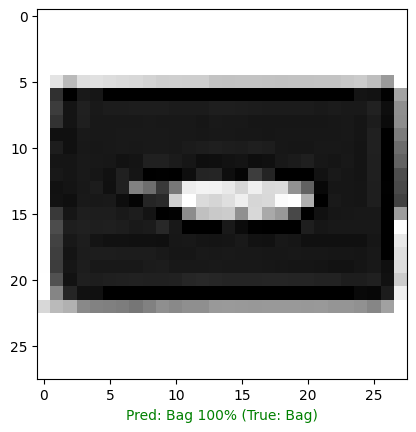

In [44]:
plot_random_image(model = model_4, images=norm_test_data, true_labels=test_labels, classes=class_names)

In [45]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,182 (1.76 MB)

 Trainable params: 154,060 (601.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 308,122 (1.18 MB)

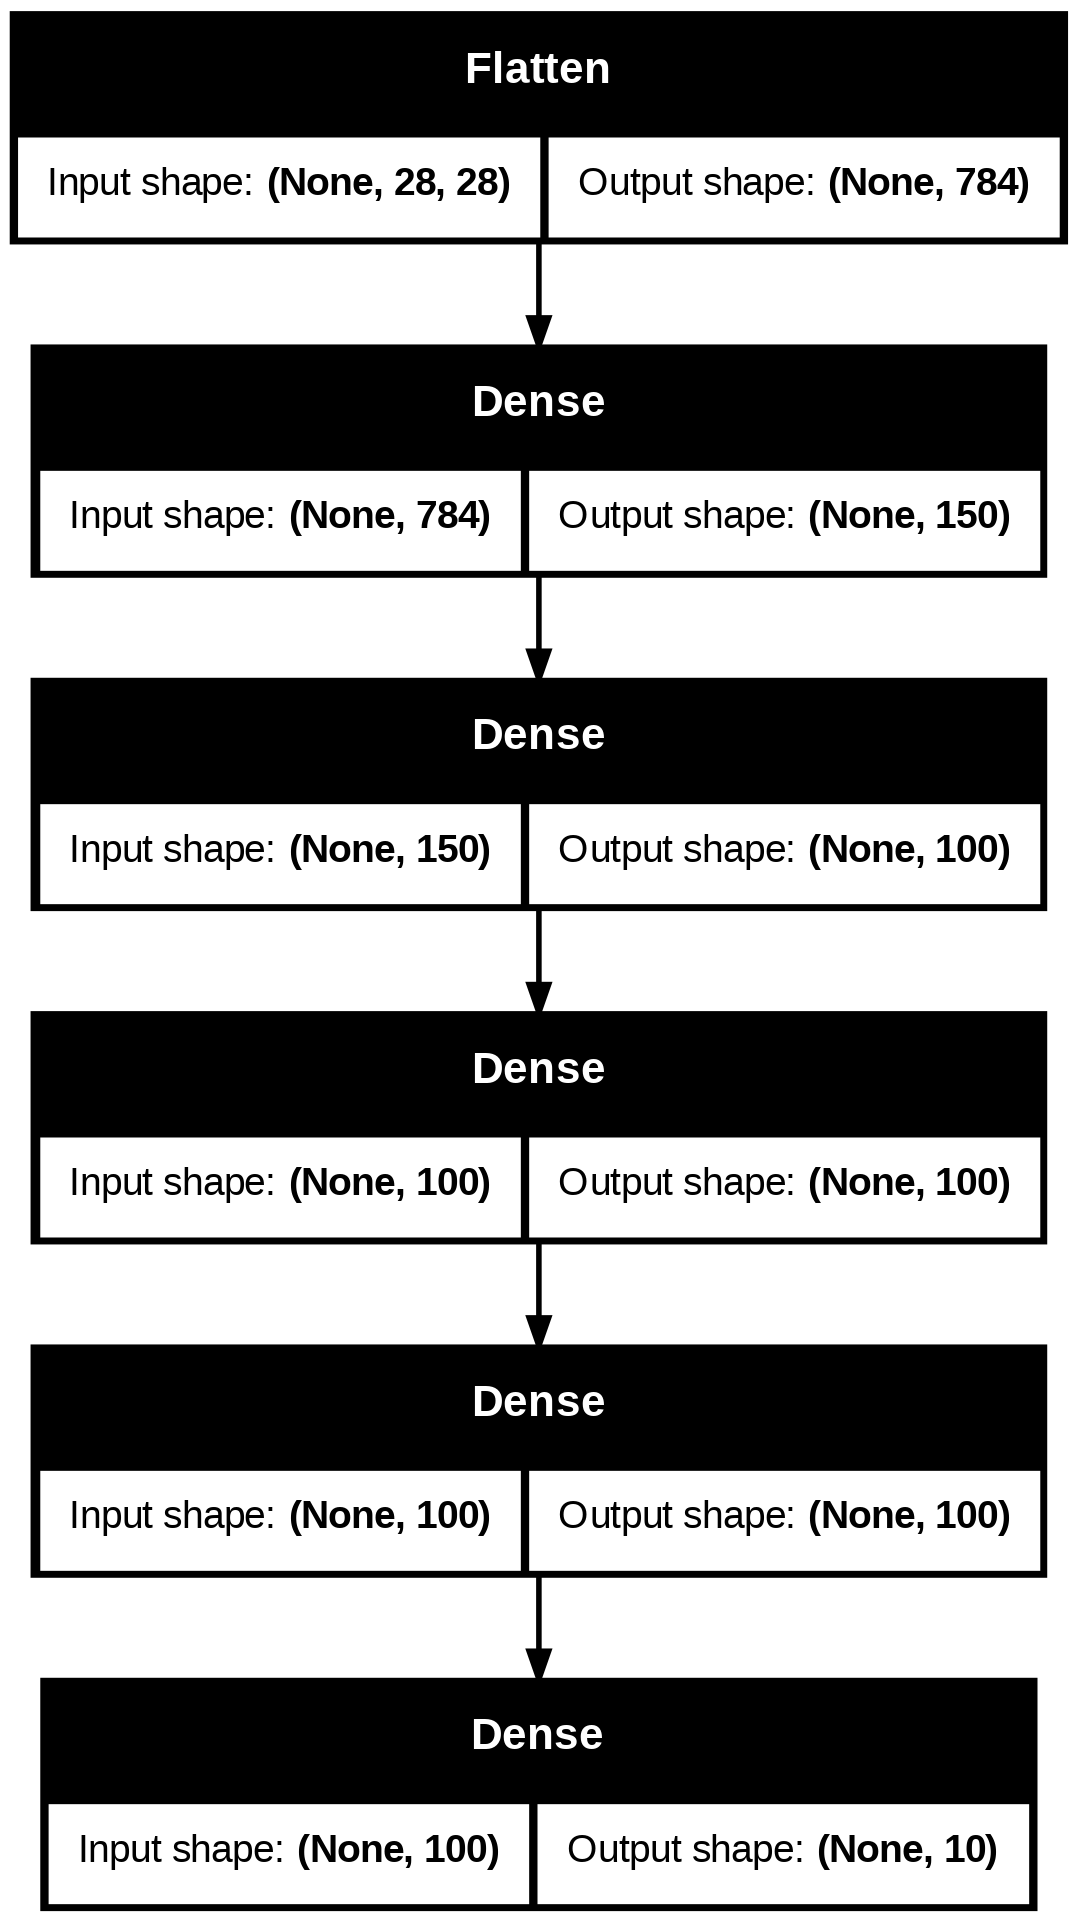

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes=True)